In [12]:
import torch
import numpy as np
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor
import cv2

from helper_functions import show_masks

In [13]:
# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(f"using device: {device}")

if device.type == "cuda":
    torch.autocast("cuda", dtype=torch.bfloat16).__enter__()
    if torch.cuda.get_device_properties(0).major >= 8:
        torch.backends.cuda.matmul.allow_tf32 = True
        torch.backends.cudnn.allow_tf32 = True

using device: cpu


In [14]:
# Function to predict the mask of an image
def predictMask(img, predictor, input_point = np.empty((0, 2)), input_label = np.empty((0,), dtype=int)):    
    predictor.set_image(img)
    pred_masks, scores, logits = predictor.predict(
        point_coords = input_point,
        point_labels = input_label,
        multimask_output = False
     )
    return pred_masks, scores, logits

In [15]:
# Change this to work on your machine
rootPath = '...'

# Define the pretrained model configuration you want to use
modelPath = "sam2_model_finetuned_epoch_3.pt"

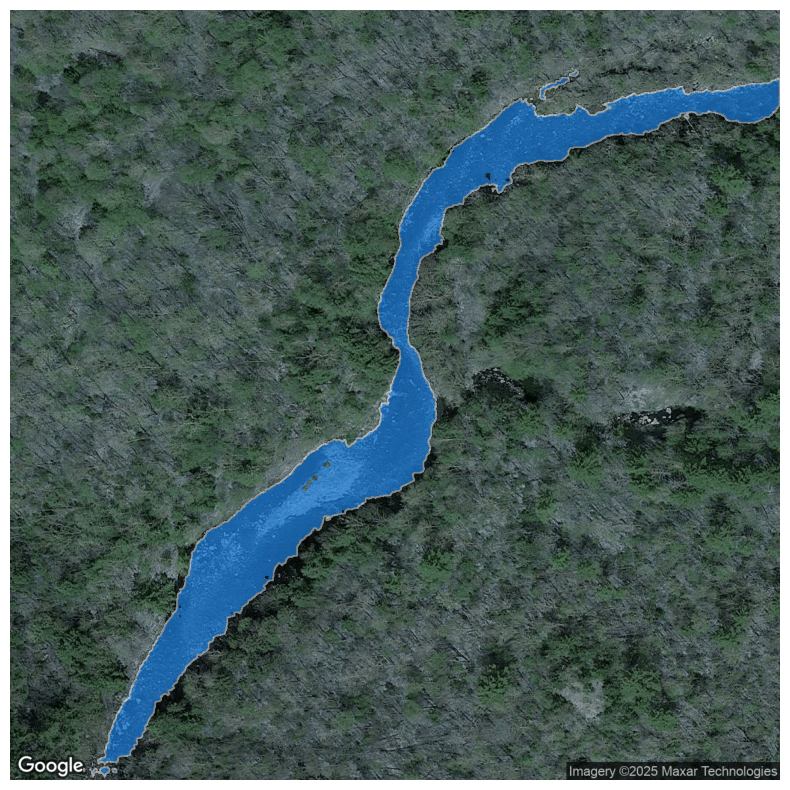

In [ ]:
sam2_checkpoint = "../checkpoints/sam2.1_hiera_tiny.pt"
model_cfg = "configs/sam2.1/sam2.1_hiera_t.yaml"

sam2_model = build_sam2(model_cfg, sam2_checkpoint, device=device)

predictor1 = SAM2ImagePredictor(sam2_model)
# Load the model state that we trained
predictor1.model.load_state_dict(torch.load(rootPath + modelPath))

## Uncomment any of these lines to test the model on a specific image
## You may also replace the path with any other image you would like to test
img = cv2.imread(rootPath + "/8999_-66.80780964334836_45.25465155192838_z18.png")
# img = cv2.imread(rootPath + "36190_-77.98019272273278_37.62485835409872_z18.png")
# img = cv2.imread(rootPath + "43473_-75.20295287107768_44.06935181786453_z18.png")

pred_masks, scores, logits = predictMask(img, predictor1)
show_masks(img, pred_masks, scores, borders=True)